In [1]:
pip install fredapi

  Using cached fredapi-0.5.0-py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

<AxesSubplot:title={'center':'S&P 500'}>

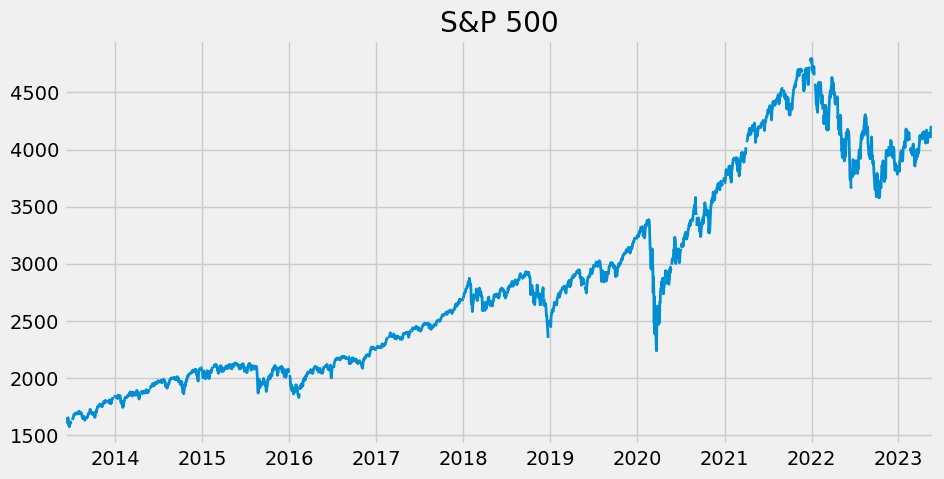

In [4]:
plt.style.use('fivethirtyeight')

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']


from fredapi import Fred

fred_key =  "40020d7c1ce10a4ab006c516df0b6e67"

fred = Fred(api_key=fred_key)

#3
sp500 = fred.get_series(series_id="SP500")
sp500.plot(figsize=(10, 5), title = 'S&P 500', lw=2)


In [6]:
unemp_results = fred.search('unemployment')

In [7]:
unrate = fred.get_series('UNRATE')

In [8]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
Length: 905, dtype: float64

<AxesSubplot:>

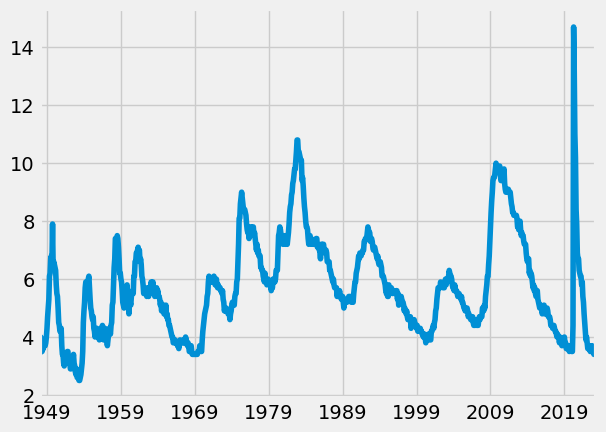

In [9]:
unrate.plot()

In [11]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [12]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"').shape

(155, 15)

In [14]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

(857, 15)

In [16]:
id_to_date = unemp_df['title'].str.replace('unemployment Rate in', '').to_dict()